# Africa Credit Challenge from IAT

## ID : 196

## Email : arithmeticisn36@gmail.com

The goals of this `challenge` are:

1. How to load data into a `Pandas` dataframe

2. How to `train` a basic machine learning model

3. How to `evaluate` the model


<font color="blue"><b>Full Name:This Adepoju Ibrahim Isola </b></font>

## 1. Import the dataset to your working environment

1.1 Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

1.2 Reading the dataseta to the working environment using pandas

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

1.3 Display the first few rows of the datasets and their shape

In [4]:
display("Train", train.head(), train.shape, "Test", test.head(), test.shape)

'Train'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


(68654, 16)

'Test'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


(18594, 15)

## 2. Clean the dataset thoroughly to the best of your ability

2.1 Check column types & missing values

In [5]:
train.info()

print(__.join(["__"]*50))
    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

2.2 Missing values checkings

In [6]:
train.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

In [7]:
test.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
dtype: int64

2.3 concat the two datasets together

In [8]:
master_data = pd.concat([train, test], axis = 0)

In [9]:
master_data.isnull().sum()

ID                                 0
customer_id                        0
country_id                         0
tbl_loan_id                        0
lender_id                          0
loan_type                          0
Total_Amount                       0
Total_Amount_to_Repay              0
disbursement_date                  0
due_date                           0
duration                           0
New_versus_Repeat                  0
Amount_Funded_By_Lender            0
Lender_portion_Funded              0
Lender_portion_to_be_repaid        0
target                         18594
dtype: int64

In [10]:
master_data_copy = master_data.copy()

In [11]:
# Handle missing values (if any)

for col in master_data_copy.select_dtypes(include=np.number).columns:
    master_data_copy[col].fillna(master_data_copy[col].mean(), inplace=True)

In [13]:
master_data_copy.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0.0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0.0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0.0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0.0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0.0


In [14]:
#  Impute missing categorical values with the mode
for col in master_data_copy.select_dtypes(exclude=np.number).columns:
    try:  # Try to impute; handle potential errors if no mode exists
        master_data_copy[col].fillna(master_data_copy[col].mode()[0], inplace=True)
    except IndexError: # If mode is not available, fill with a placeholder
        master_data_copy[col].fillna('Unknown', inplace=True)
        print(f"Warning: No mode found for column '{col}'. Filled with 'Unknown'.")
        

In [15]:
master_data_copy

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.00,8448.00,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.00,0.000000
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.00,25979.00,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.00,0.000000
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.00,7142.00,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.00,0.000000
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.00,9233.00,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.00,0.000000
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.00,4728.00,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,7,Repeat Loan,269.41,0.155689,279.77,0.018324
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,7,Repeat Loan,460.20,0.300000,460.00,0.018324
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,7,Repeat Loan,178.67,0.130208,178.67,0.018324
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,7,Repeat Loan,0.00,0.000000,0.00,0.018324


In [18]:
master_data_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87248 entries, 0 to 18593
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           87248 non-null  object 
 1   customer_id                  87248 non-null  int64  
 2   country_id                   87248 non-null  object 
 3   tbl_loan_id                  87248 non-null  int64  
 4   lender_id                    87248 non-null  int64  
 5   loan_type                    87248 non-null  object 
 6   Total_Amount                 87248 non-null  float64
 7   Total_Amount_to_Repay        87248 non-null  float64
 8   disbursement_date            87248 non-null  object 
 9   due_date                     87248 non-null  object 
 10  duration                     87248 non-null  int64  
 11  New_versus_Repeat            87248 non-null  object 
 12  Amount_Funded_By_Lender      87248 non-null  float64
 13  Lender_portion_F

In [22]:
# convert categorical variables to numerical variables

master_data_copy['loan_type'] = pd.Categorical(master_data_copy['loan_type']).codes

In [23]:
master_data_copy['ID'] = master_data_copy['ID'].astype(str).str.replace('[ID,_]',' ', regex = True)

In [24]:
master_data_copy['New_versus_Repeat'] = pd.Categorical(master_data_copy['New_versus_Repeat']).codes

In [25]:
master_data_copy['ID'] = pd.Categorical(master_data_copy['ID']).codes

In [26]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(master_data_copy, columns=[col for col in master_data_copy.columns if master_data_copy[col].dtype == 'object'], drop_first=True) 


In [27]:
data

,ID,customer_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,...,due_date_2024-12-03,due_date_2024-12-07,due_date_2024-12-11,due_date_2024-12-25,due_date_2025-01-06,due_date_2025-01-10,due_date_2025-01-16,due_date_2025-06-22,due_date_2025-07-02,due_date_2025-10-27
0,71539,266671,248032,267278,0,8448.00,8448.00,7,1,120.85,...,0,0,0,0,0,0,0,0,0,0
1,20157,248919,228515,267278,0,25895.00,25979.00,7,1,7768.50,...,0,0,0,0,0,0,0,0,0,0
2,84490,308486,370501,251804,21,6900.00,7142.00,7,1,1380.00,...,0,0,0,0,0,0,0,0,0,0
3,69968,266004,285009,267278,0,8958.00,9233.00,7,1,2687.40,...,0,0,0,0,0,0,0,0,0,0
4,36345,253803,305312,267278,0,4564.00,4728.00,7,1,1369.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,83417,297596,365331,297183,17,1730.41,1782.32,7,1,269.41,...,0,0,0,0,0,0,0,0,0,0
18590,54269,259715,231897,267278,0,1534.00,1534.00,7,1,460.20,...,0,0,0,0,0,0,0,0,0,0
18591,81913,296701,364008,297183,17,1372.21,1413.30,7,1,178.67,...,0,0,0,0,0,0,0,0,0,0
18592,74055,268271,242864,267278,0,5608.00,5781.00,7,1,0.00,...,0,0,0,0,0,0,0,0,0,0


### Research Question

> question 1:Does the loan type (load_type) significantly influence the total amount to be repaid (Total_amount_to_repay), 
after controlling for the total loan amount (Total_amount) and loan duration (duration)?  
(This question explores if certain loan types have higher interest rates or fees, independent of the loan size and term.)

In [35]:
# 2. Convert Data Types:

data['loan_type'] = data['loan_type'].astype(str)  
data['Total_Amount'] = pd.to_numeric(data['Total_Amount'], errors='coerce') 
data['Total_Amount_to_Repay'] = pd.to_numeric(data['Total_Amount_to_Repay'], errors='coerce')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')


In [36]:
# 3. Create Dummy Variables for 'loan_type':
df = pd.get_dummies(data, columns=['loan_type'], drop_first=True) 

In [37]:
df

,ID,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,...,loan_type_21,loan_type_22,loan_type_23,loan_type_3,loan_type_4,loan_type_5,loan_type_6,loan_type_7,loan_type_8,loan_type_9
0,71539,266671,248032,267278,8448.00,8448.00,7,1,120.85,0.014305,...,0,0,0,0,0,0,0,0,0,0
1,20157,248919,228515,267278,25895.00,25979.00,7,1,7768.50,0.300000,...,0,0,0,0,0,0,0,0,0,0
2,84490,308486,370501,251804,6900.00,7142.00,7,1,1380.00,0.200000,...,1,0,0,0,0,0,0,0,0,0
3,69968,266004,285009,267278,8958.00,9233.00,7,1,2687.40,0.300000,...,0,0,0,0,0,0,0,0,0,0
4,36345,253803,305312,267278,4564.00,4728.00,7,1,1369.20,0.300000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,83417,297596,365331,297183,1730.41,1782.32,7,1,269.41,0.155689,...,0,0,0,0,0,0,0,0,0,0
18590,54269,259715,231897,267278,1534.00,1534.00,7,1,460.20,0.300000,...,0,0,0,0,0,0,0,0,0,0
18591,81913,296701,364008,297183,1372.21,1413.30,7,1,178.67,0.130208,...,0,0,0,0,0,0,0,0,0,0
18592,74055,268271,242864,267278,5608.00,5781.00,7,1,0.00,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Define the model formula:
# 'Total_amount_to_repay' is the dependent variable.
# 'Total_amount' and 'duration' are control variables.
# The different loan types (created by one-hot encoding) are the independent variables of interest.

formula = 'Total_Amount_to_Repay ~ Total_Amount + duration +' + ' + '.join([col for col in df.columns if col.startswith('loan_type_')])

In [39]:
formula

'Total_Amount_to_Repay ~ Total_Amount + duration +loan_type_1 + loan_type_10 + loan_type_11 + loan_type_12 + loan_type_13 + loan_type_14 + loan_type_15 + loan_type_16 + loan_type_17 + loan_type_18 + loan_type_19 + loan_type_2 + loan_type_20 + loan_type_21 + loan_type_22 + loan_type_23 + loan_type_3 + loan_type_4 + loan_type_5 + loan_type_6 + loan_type_7 + loan_type_8 + loan_type_9'

In [41]:
import statsmodels.formula.api as smf  

In [42]:
# Fit the linear regression model:
model = smf.ols(formula, data=df).fit()

In [43]:
# Print the model summary:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Total_Amount_to_Repay   R-squared:                       0.997
Model:                               OLS   Adj. R-squared:                  0.997
Method:                    Least Squares   F-statistic:                 1.083e+06
Date:                   Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                           14:36:49   Log-Likelihood:            -9.2416e+05
No. Observations:                  87248   AIC:                         1.848e+06
Df Residuals:                      87222   BIC:                         1.849e+06
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4068

### Visualization

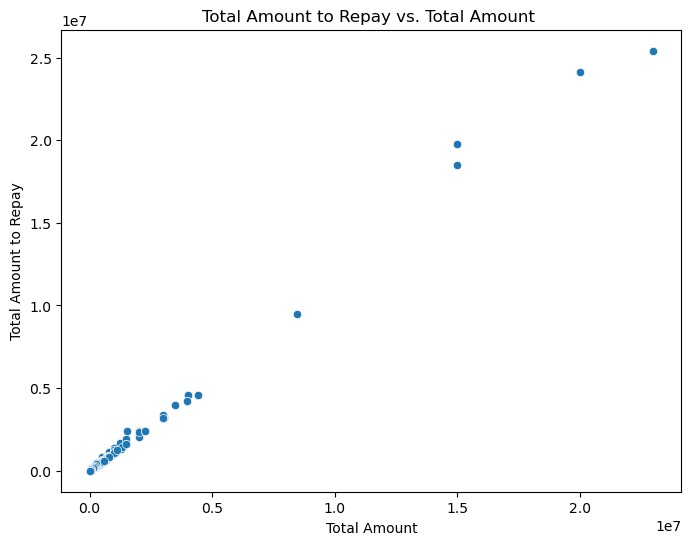

In [47]:
# 1. Visualize the relationship between 'Total_amount_to_repay' and 'Total_amount'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Amount', y='Total_Amount_to_Repay',  data=df)
plt.title('Total Amount to Repay vs. Total Amount ')
plt.xlabel('Total Amount')
plt.ylabel('Total Amount to Repay')
plt.show()

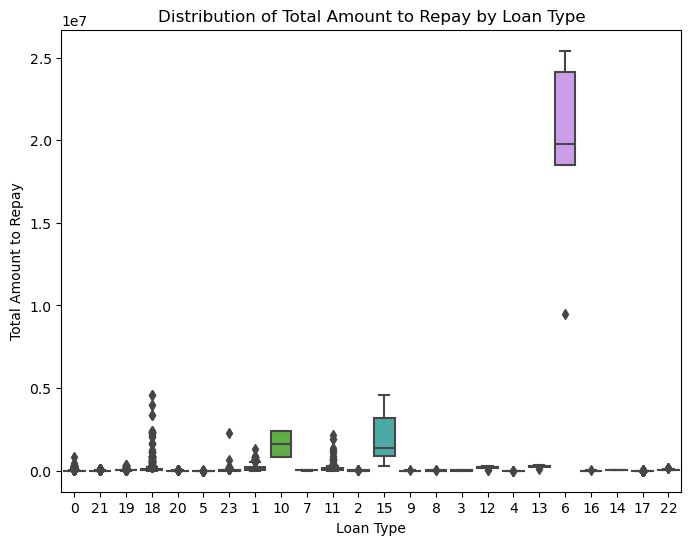

In [49]:
# 2. Visualize the distribution of 'Total_amount_to_repay' for each 'load_type'
plt.figure(figsize=(8, 6))
sns.boxplot(x= data['loan_type'], y='Total_Amount_to_Repay', data=df)
plt.title('Distribution of Total Amount to Repay by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Total Amount to Repay')
plt.show()

## Question 2 : 
> To what extent does the lender's portion to be repaid (leader_portion_to_be_repaid) predict the likelihood of a customer being a new versus repeat customer (New_versus_repeat), when accounting for the total loan amount (Total_amount) and the amount founded by the lender (Amount_founded_by_lender)? (This investigates if the lender's risk-sharing influences the type of customer they attract.)

In [54]:
# 2. Convert Data Types:
data['New_versus_Repeat'] = data['New_versus_Repeat'].astype(str) 
data['Lender_portion_to_be_repaid'] = pd.to_numeric(data['Lender_portion_to_be_repaid'], errors='coerce')
data['Total_Amount'] = pd.to_numeric(data['Total_Amount'], errors='coerce')
data['Amount_Funded_By_Lender'] = pd.to_numeric(data['Amount_Funded_By_Lender'], errors='coerce')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

In [55]:
# 3. Create Dummy Variables for 'New_versus_repeat':
data['New_versus_Repeat'] = data['New_versus_Repeat'].map({'Repeat': 1, 'New': 0}) 


In [56]:
# Define the model formula (Logistic Regression):
formula1 = 'New_versus_Repeat ~ Lender_portion_to_be_repaid + Total_Amount + Amount_Funded_By_Lender + duration'


In [57]:


# Fit the logistic regression model:
model = smf.logit(formula1, data=df).fit()

# Print the model summary:
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.047648
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:      New_versus_Repeat   No. Observations:                87248
Model:                          Logit   Df Residuals:                    87243
Method:                           MLE   Df Model:                            4
Date:                Sat, 08 Feb 2025   Pseudo R-squ.:                 0.02126
Time:                        14:51:13   Log-Likelihood:                -4157.2
converged:                       True   LL-Null:                       -4247.5
Covariance Type:            nonrobust   LLR p-value:                 5.557e-38
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.8669      0.041    118.647      0.000  

## VISUALIZATION

In [58]:
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

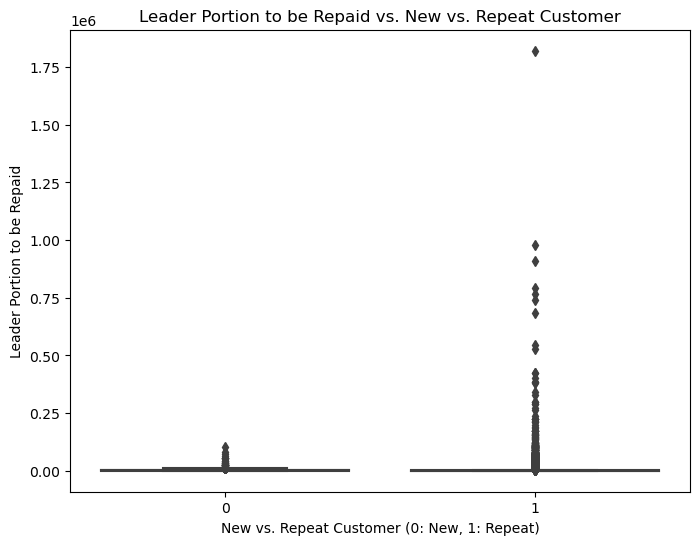

In [62]:
#  Boxplot of 'leader_portion_to_be_repaid' vs. 'New_versus_repeat'
plt.figure(figsize=(8, 6))
sns.boxplot(x='New_versus_Repeat', y='Lender_portion_to_be_repaid', data=df)
plt.title('Leader Portion to be Repaid vs. New vs. Repeat Customer')
plt.xlabel('New vs. Repeat Customer (0: New, 1: Repeat)')  
plt.ylabel('Leader Portion to be Repaid')
plt.show()

## Question 3:
> Does the disbursement date (disbursement_date), in relation to the due date (due_date) and loan duration (duration), affect the total amount to be repaid (Total_amount_to_repay), considering the total loan amount (Total_amount)? (This explores if the timing of disbursement has an impact on repayment, perhaps due to economic cycles or customer cash flow.)

In [69]:
# 2. Convert Data Types:
master_data_copy['disbursement_date'] = pd.to_datetime(master_data_copy['disbursement_date'], errors='coerce')  # Convert to datetime
master_data_copy['due_date'] = pd.to_datetime(master_data_copy['due_date'], errors='coerce')  # Convert to datetime
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')
data['Total_Amount'] = pd.to_numeric(data['Total_Amount'], errors='coerce')
data['Total_Amount_to_Repay'] = pd.to_numeric(data['Total_Amount_to_Repay'], errors='coerce')

In [70]:
#  Feature Engineering (Crucial for this question):
# Calculate the time difference between disbursement and due dates
master_data_copy['time_to_due'] = (master_data_copy['due_date'] - master_data_copy['disbursement_date']).dt.days  # In days

In [72]:
# Calculate the relative disbursement date (e.g., days since the start of the dataset)
master_data_copy['disbursement_date_relative'] = (master_data_copy['disbursement_date'] - master_data_copy['disbursement_date'].min()).dt.days

In [75]:

# Handle potential infinite or very large values after date calculations.
master_data_copy.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
for col in ['time_to_due', 'disbursement_date_relative']:
    if master_data_copy[col].isnull().any():
        master_data_copy[col].fillna(df[col].mean(), inplace=True)

In [76]:
# Define the model formula:
formula2 = 'Total_Amount_to_Repay ~ Total_amount + duration + time_to_due + disbursement_date_relative'

In [77]:

# Fit the linear regression model:
model = smf.ols(formula, data=df).fit()

# Print the model summary:
print(model.summary())




                              OLS Regression Results                             
Dep. Variable:     Total_Amount_to_Repay   R-squared:                       0.997
Model:                               OLS   Adj. R-squared:                  0.997
Method:                    Least Squares   F-statistic:                 1.083e+06
Date:                   Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                           15:10:22   Log-Likelihood:            -9.2416e+05
No. Observations:                  87248   AIC:                         1.848e+06
Df Residuals:                      87222   BIC:                         1.849e+06
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4068

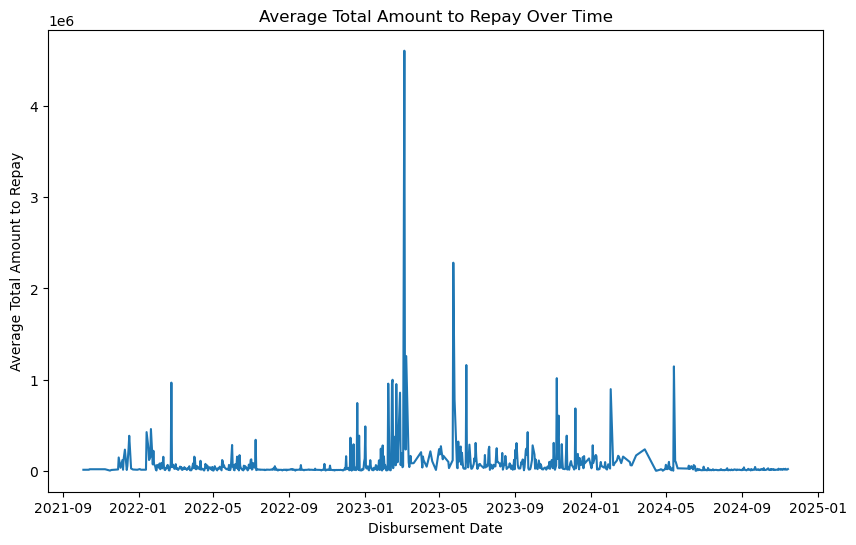

In [79]:
#Time series plot of average 'Total_amount_to_repay' by 'disbursement_date'
master_data_copy['disbursement_date'] = pd.to_datetime(master_data_copy['disbursement_date'], errors='coerce') # Ensure datetime
data_grouped = master_data_copy.groupby('disbursement_date')['Total_Amount_to_Repay'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['disbursement_date'], data_grouped['Total_Amount_to_Repay'])
plt.title('Average Total Amount to Repay Over Time')
plt.xlabel('Disbursement Date')
plt.ylabel('Average Total Amount to Repay')
plt.show()

##  Question 4:

> How does the interaction between country ID (country_id) and lender ID (lender_id) influence the total amount to be repaid (Total_amount_to_repay), after adjusting for the total loan amount (Total_amount) and loan duration (duration)? (This investigates if certain lenders have different repayment outcomes in different countries, suggesting variations in lending practices or regulatory environments.)


In [83]:
# Convert Data Types:
master_data_copy['country_id'] = master_data_copy['country_id'].astype(str)
data['lender_id'] = data['lender_id'].astype(str)
data['Total_Amount'] = pd.to_numeric(data['Total_Amount'], errors='coerce')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')
data['Total_Amount_to_Repay'] = pd.to_numeric(data['Total_Amount_to_Repay'], errors='coerce')

In [85]:
#  Create Dummy Variables for 'country_id' and 'lender_id':
data_1 = pd.get_dummies(master_data_copy, columns=['country_id', 'lender_id'], drop_first=True)  


In [87]:
# Define the model formula, including the interaction term:
formula = 'Total_amount_to_repay ~ Total_amount + duration +' + \
          ' + '.join([col for col in master_data_copy.columns if col.startswith('country_id_')]) + \
          ' + '.join([col for col in data.columns if col.startswith('lender_id_')]) + \
          ' + ' + ' + '.join([f'country_id_{i}:lender_id_{j}' for i in df.columns if col.startswith('country_id_') for j in data.columns if col.startswith('lender_id_')]) # Interaction term


In [94]:


# Fit the linear regression model:
model = smf.ols(formula, data=df).fit()

# Print the model summary:
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Total_Amount_to_Repay   R-squared:                       0.997
Model:                               OLS   Adj. R-squared:                  0.997
Method:                    Least Squares   F-statistic:                 1.083e+06
Date:                   Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                           15:32:41   Log-Likelihood:            -9.2416e+05
No. Observations:                  87248   AIC:                         1.848e+06
Df Residuals:                      87222   BIC:                         1.849e+06
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4068

In [82]:
data

,ID,customer_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,...,due_date_2024-12-03,due_date_2024-12-07,due_date_2024-12-11,due_date_2024-12-25,due_date_2025-01-06,due_date_2025-01-10,due_date_2025-01-16,due_date_2025-06-22,due_date_2025-07-02,due_date_2025-10-27
0,71539,266671,248032,267278,0,8448.00,8448.00,7,NaN,120.85,...,0,0,0,0,0,0,0,0,0,0
1,20157,248919,228515,267278,0,25895.00,25979.00,7,NaN,7768.50,...,0,0,0,0,0,0,0,0,0,0
2,84490,308486,370501,251804,21,6900.00,7142.00,7,NaN,1380.00,...,0,0,0,0,0,0,0,0,0,0
3,69968,266004,285009,267278,0,8958.00,9233.00,7,NaN,2687.40,...,0,0,0,0,0,0,0,0,0,0
4,36345,253803,305312,267278,0,4564.00,4728.00,7,NaN,1369.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,83417,297596,365331,297183,17,1730.41,1782.32,7,NaN,269.41,...,0,0,0,0,0,0,0,0,0,0
18590,54269,259715,231897,267278,0,1534.00,1534.00,7,NaN,460.20,...,0,0,0,0,0,0,0,0,0,0
18591,81913,296701,364008,297183,17,1372.21,1413.30,7,NaN,178.67,...,0,0,0,0,0,0,0,0,0,0
18592,74055,268271,242864,267278,0,5608.00,5781.00,7,NaN,0.00,...,0,0,0,0,0,0,0,0,0,0


## Visualization

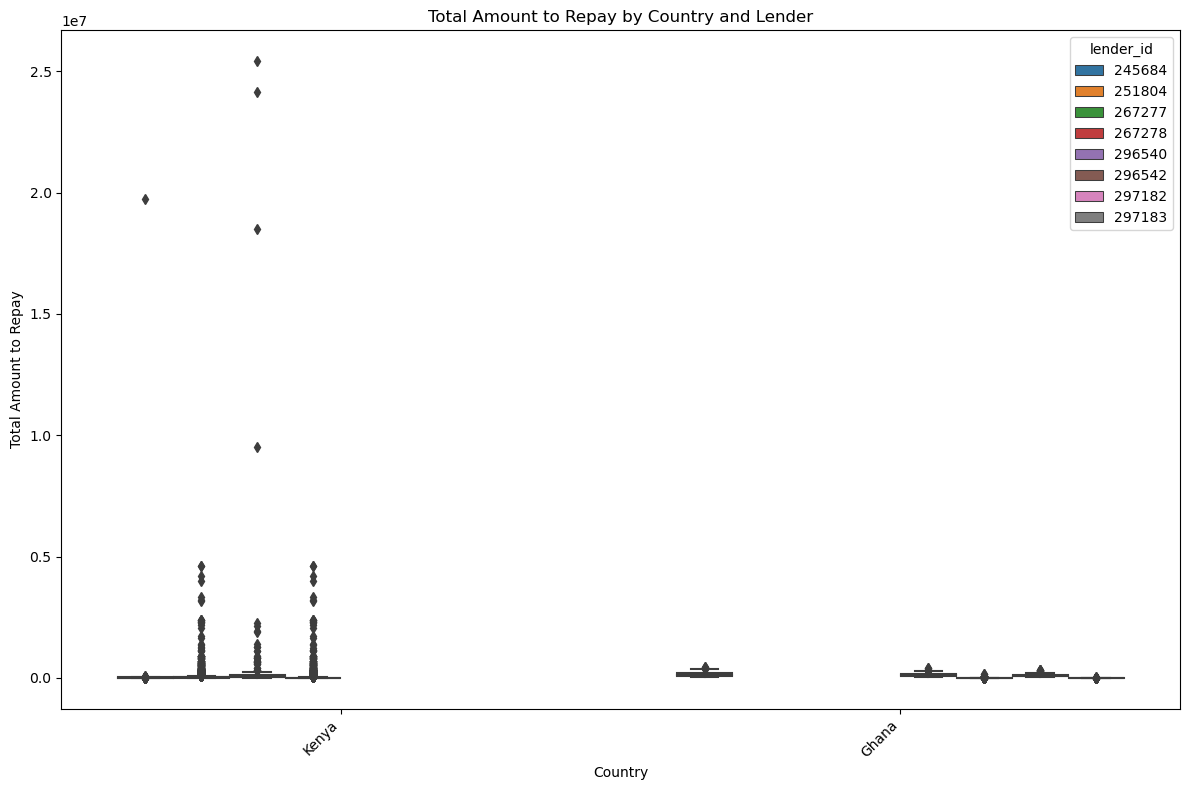

In [89]:
#  Boxplots of 'Total_amount_to_repay' by 'country_id' and 'lender_id'
plt.figure(figsize=(12, 8))  
sns.boxplot(x=master_data_copy['country_id'], y='Total_Amount_to_Repay', hue='lender_id', data=df)
plt.title('Total Amount to Repay by Country and Lender')
plt.xlabel('Country')
plt.ylabel('Total Amount to Repay')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Question 5:
 > Does the amount founded by the lender (Amount_founded_by_lender), in conjunction with the total loan amount (Total_amount), predict the likelihood of a customer being a new versus repeat customer (New_versus_repeat), when controlling for loan duration (duration)? (This explores if the funding source influences customer acquisition and retention.)

In [91]:
#  Convert Data Types:
data['New_versus_Repeat'] = df['New_versus_Repeat'].astype(str)
data['Amount_Funded_By_Lender'] = pd.to_numeric(data['Amount_Funded_By_Lender'], errors='coerce')
data['Total_Amount'] = pd.to_numeric(data['Total_Amount'], errors='coerce')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

In [92]:
# 3. Create Dummy Variables for 'New_versus_repeat':
data['New_versus_Repeat'] = df['New_versus_Repeat'].map({'Repeat': 1, 'New': 0}) # Map to numerical (1/0)


In [ ]:
# Define the model formula (Logistic Regression with interaction):
formula4 = 'New_versus_Repeat ~ Amount_Funded_By_Lender + Total_Amount + duration + Amount_Funded_By_Lender:Total_Amount'

## Visualization

In [98]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [99]:
y_prob = model.predict()
fpr, tpr, _ = roc_curve(df['New_versus_Repeat'], y_prob)
roc_auc = auc(fpr, tpr)

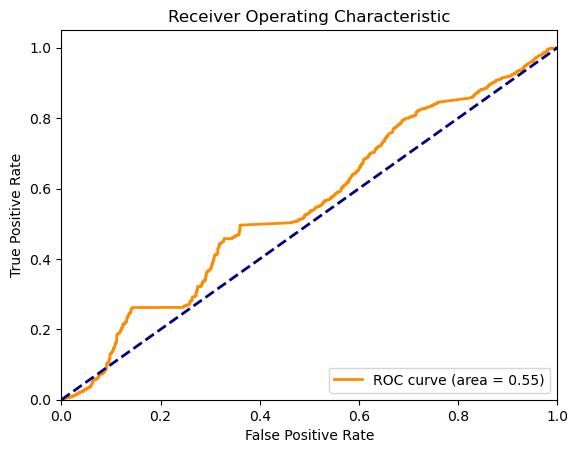

In [100]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

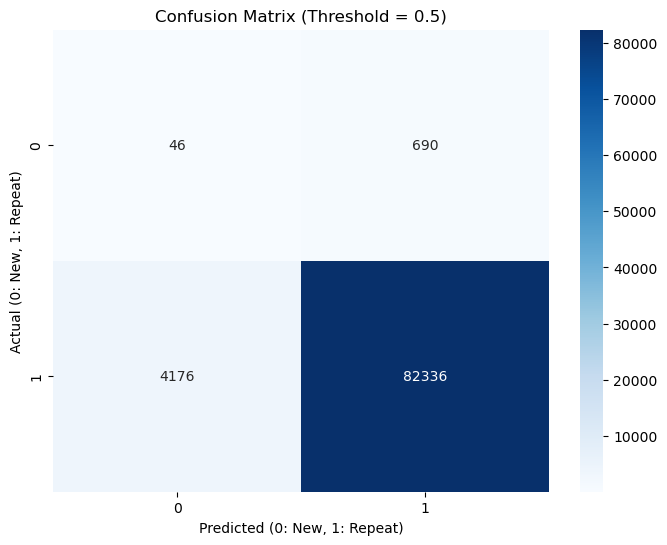

In [101]:
## Confusion Matrix
threshold = 0.5  # Adjust as needed
y_pred_class = [1 if p > threshold else 0 for p in y_prob]
cm = confusion_matrix(df['New_versus_Repeat'], y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted (0: New, 1: Repeat)')
plt.ylabel('Actual (0: New, 1: Repeat)')
plt.show()